# Topic Modeling
## Introduction
In this notebook, the goal will be to use topic modeling to find similarities between words in the corpus to try and draw out related topics. This will be accomplished using Latent Dirichlet Allocation (LDA and Non-Negative Matrix Factorization (NMF). We'll then compare the results to see which model performs better. Additionally, we can expect some overlap in the topics since many terms used on Stack Overflow are related to computer programming and thus have similarities. For example, object-oriented programming could be a topic that refers to multiple programming languages such as Java and Python, and a topic that refers to the command line could be related to Unix, the Mac terminal, or git.

In [24]:
# data analysis and manipulation
import pandas as pd
import numpy as np

# files
import pickle

# natural language processing
import nltk
from nltk import pos_tag
from nltk.tokenize import word_tokenize, sent_tokenize, RegexpTokenizer
from nltk.util import ngrams
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import gensim.corpora as corpora

# topic modeling
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from gensim import matutils, models, corpora, similarities
from gensim.test.utils import common_corpus
import scipy.sparse

## LDA - Count Vectorizer
In the notebook where we performed EDA and added stopwords make the stopwords list included in the vectorizer objects more robust, it appeared that the count vectorizer did a better job of catching those terms that were a concatenation and/or were not actual words, so this vectorizer object will be the one that we move forward with for topic modeling. For now, we'll attempt to use LDA without using further text pre-processing methods such as lemmatization and parts of speech tagging, but that might be helpful in the future.
### Attempt With All Text

In [25]:
# read in the count vectorizer document-term matrix
df_cv = pd.read_pickle('df_stop_cv.pkl')
df_cv

,aaa,ab,aba,abab,ababab,ababba,abaccddccefe,abacounter,abaddressbookcreate,abaddressbookcreatewithoptions,...,zooms,zooplanktona,zr,zsh,zshrc,zulu,zvfzjni,zxf,zxwhat,zyst
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14086,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14087,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14088,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14089,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
# a term-document matrix is one of the required inputs for the LDA model
tdm_cv = df_cv.transpose()
tdm_cv.head()

,0,1,2,3,4,5,6,7,8,9,...,14081,14082,14083,14084,14085,14086,14087,14088,14089,14090
aaa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ab,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aba,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abab,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ababab,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
# put the term-document matrix into a gensim format
sparse_counts = scipy.sparse.csr_matrix(tdm_cv)
corpus = matutils.Sparse2Corpus(sparse_counts)

In [28]:
# a dictionary of terms and their location are also required inputs for the LDA model
cv = pickle.load(open("cv_stop.pkl", "rb"))
id2word = dict((v, k) for k, v in cv.vocabulary_.items())

In [ ]:
# number of topics and number of passes are needed, as well
lda1 = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=2, passes=10)
lda1.print_topics()

In [ ]:
# LDA for num_topics = 3
lda2 = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=3, passes=10)
lda2.print_topics()

In [ ]:
# LDA for num_topics = 4
lda3 = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=4, passes=10)
lda3.print_topics()

In [ ]:
# LDA for num_topics = 20
lda4 = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=20, passes=10)
lda4.print_topics()

The model with 20 topics looks like it has some words that are identifiable as topics.
* Topic 0: Words like page, script, and html clearly belong to a topic related to web development or HTML/CSS.
* Topic 7: Words like git, branch, changes, and merge look like they relate to git.
* Topic 17: The words table, query, and select, among others, are related to SQL.

We can stop here for now, and, perhaps with more text preprocessing, in the future we can draw out even clearer topics. We'll run the model one more time with a larger number of passes to see if there is an improvement.

In [29]:
# final LDA model
lda5 = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=20, passes=20)
lda5.print_topics()

[(0,
  '0.080*"git" + 0.042*"branch" + 0.036*"changes" + 0.033*"gem" + 0.023*"repository" + 0.021*"merge" + 0.019*"commit" + 0.014*"repo" + 0.014*"feature" + 0.014*"master"'),
 (1,
  '0.032*"warning" + 0.024*"compiler" + 0.019*"difference" + 0.018*"reference" + 0.017*"person" + 0.015*"pointers" + 0.013*"gcc" + 0.013*"pointer" + 0.009*"functions" + 0.009*"declaration"'),
 (2,
  '0.099*"int" + 0.052*"date" + 0.042*"type" + 0.030*"datetime" + 0.026*"long" + 0.024*"byte" + 0.024*"include" + 0.020*"return" + 0.017*"struct" + 0.017*"const"'),
 (3,
  '0.031*"data" + 0.030*"url" + 0.030*"json" + 0.026*"post" + 0.024*"request" + 0.022*"template" + 0.021*"controller" + 0.019*"view" + 0.019*"response" + 0.016*"http"'),
 (4,
  '0.050*"visual" + 0.042*"studio" + 0.030*"delete" + 0.028*"video" + 0.025*"crash" + 0.021*"stream" + 0.015*"lock" + 0.014*"ac" + 0.014*"aspx" + 0.014*"hanging"'),
 (5,
  '0.020*"like" + 0.015*"way" + 0.012*"want" + 0.011*"im" + 0.011*"data" + 0.011*"code" + 0.010*"using" + 0

## LDA - TF-IDF Vectorizer
### Attempt With All Text

In [30]:
# read in the count vectorizer document-term matrix
df_tfidf = pd.read_pickle('df_stop_tfidf.pkl')
df_tfidf

,aaa,ab,aba,abab,ababab,ababba,abaccddccefe,abacounter,abaddressbookcreate,abaddressbookcreatewithoptions,...,zooms,zooplanktona,zr,zsh,zshrc,zulu,zvfzjni,zxf,zxwhat,zyst
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14086,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14087,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14088,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14089,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
tdm_tfidf = df_tfidf.transpose()
tdm_tfidf.head()

,0,1,2,3,4,5,6,7,8,9,...,14081,14082,14083,14084,14085,14086,14087,14088,14089,14090
aaa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ab,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aba,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abab,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ababab,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
sparse_counts1 = scipy.sparse.csr_matrix(tdm_tfidf)
corpus1 = matutils.Sparse2Corpus(sparse_counts1)

In [33]:
tfidfv = pickle.load(open("tfidf_stop.pkl", "rb"))
id2word1 = dict((v, k) for k, v in tfidfv.vocabulary_.items())

In [ ]:
# LDA for num_topics = 2
lda_tfidf1 = models.LdaModel(corpus=corpus1, id2word=id2word1, num_topics=2, passes=10)
lda_tfidf1.print_topics()

In [ ]:
# LDA for num_topics = 3
lda_tfidf2 = models.LdaModel(corpus=corpus1, id2word=id2word1, num_topics=3, passes=10)
lda_tfidf2.print_topics()

In [ ]:
# LDA for num_topics = 4
lda_tfidf3 = models.LdaModel(corpus=corpus1, id2word=id2word1, num_topics=4, passes=10)
lda_tfidf3.print_topics()

In [ ]:
# LDA for num_topics = 20
lda_tfidf4 = models.LdaModel(corpus=corpus1, id2word=id2word1, num_topics=20, passes=10)
lda_tfidf4.print_topics()

In [34]:
# final LDA model using TF-IDF vectorizer
lda_tfidf5 = models.LdaModel(corpus=corpus1, id2word=id2word1, num_topics=20, passes=20)
lda_tfidf5.print_topics()

[(0,
  '0.030*"div" + 0.029*"image" + 0.022*"html" + 0.020*"page" + 0.017*"width" + 0.015*"want" + 0.014*"height" + 0.013*"script" + 0.012*"css" + 0.012*"style"'),
 (1,
  '0.029*"application" + 0.023*"app" + 0.020*"user" + 0.014*"view" + 0.011*"android" + 0.010*"users" + 0.010*"web" + 0.009*"device" + 0.007*"need" + 0.007*"data"'),
 (2,
  '0.065*"foo" + 0.065*"bar" + 0.049*"import" + 0.038*"person" + 0.027*"tab" + 0.020*"break" + 0.015*"intent" + 0.015*"camera" + 0.014*"foobar" + 0.012*"struts"'),
 (3,
  '0.057*"git" + 0.031*"changes" + 0.030*"branch" + 0.016*"repository" + 0.015*"merge" + 0.013*"commit" + 0.013*"self" + 0.013*"alloc" + 0.012*"nil" + 0.011*"scroll"'),
 (4,
  '0.083*"class" + 0.064*"public" + 0.044*"new" + 0.026*"method" + 0.026*"return" + 0.024*"void" + 0.024*"private" + 0.021*"object" + 0.017*"static" + 0.015*"property"'),
 (5,
  '0.023*"im" + 0.021*"like" + 0.019*"use" + 0.016*"way" + 0.015*"using" + 0.013*"know" + 0.011*"just" + 0.010*"want" + 0.010*"dont" + 0.010*"

## NMF - Count Vectorizer
Let's also run a non-negative matrix factorization model to see what insights we can get and see if it's an improvement over the LDA model.

In [35]:
# read in the corpus
df = pd.read_pickle('df_stop.pkl')

In [ ]:
nmf_model = NMF(n_components=20)
doc_word = cv.fit_transform(df.no_stop_words)
doc_topic = nmf_model.fit_transform(doc_word)

In [ ]:
# create a dataframe
df_nmf_cv = pd.DataFrame(nmf_model.components_, columns=cv.get_feature_names())
df_nmf_cv

In [ ]:
# look at top 10 highest ranked words for each topic
for topic in range(df_nmf_cv.shape[0]):
    tmp = df_nmf_cv.iloc[topic]
    print(f'For topic {topic+1} the words with the highest value are:')
    print(tmp.nlargest(10))
    print('\n')

## Visualization
### Add Topics to the DataFrame
Now that we have our topics, we'll create a new column in the original DataFrame to label each question with its corresponding topic and corresponding topic probability (i.e. the probability that each question falls into its related topic label).

In [36]:
def get_top_topic(model):
    """
    Gets top topic from model for each document.
    Input: model
    Output: highest probability topic assignment according to model (standardized to start with 1 instead of 0)
    """
    top_topics = []
    get_document_topics = [model.get_document_topics(item) for item in corpus]
    for topic in get_document_topics:
        #gets top topic and adds 1, because model outputs begin with 0
        top_topic = max(topic, key= lambda x: x[-1])[0]+1
        top_topics.append(top_topic)
    return top_topics

def get_top_proba(model):
    """
    Gets top topic probability from model for each document.
    Input: model
    Output: probability for highest probability topic assignment according to model 
    """
    top_probas = []
    get_document_topics = [model.get_document_topics(item) for item in corpus]
    for topic in get_document_topics:
        top_proba = max(topic, key= lambda x: x[-1])[1]
        top_probas.append(top_proba)
    return top_probas

In [37]:
# create new column for topic assignment
df['topic'] = get_top_topic(lda5)
#create new column for topic probabilities
df['topic_proba']= get_top_proba(lda5)

In [38]:
df.head()

,id,title,body,answer_count,favorite_count,score,tags,view_count,reputation,no_stop_words,topic,topic_proba
0,11227809,Why is processing a sorted array faster than a...,here is a piece of c code that seems very pecu...,13,7317.0,14772,java c++ performance optimization branch-predi...,805490,1,piece c code peculiar strange reason sorting d...,6,0.339476
1,477816,What is the correct JSON content type?,ive been messing around with json for some tim...,29,1089.0,6768,json content-type,1403837,95,ive messing json time just pushing text anybod...,7,0.340214
2,244777,Can I use comments inside a JSON file?,can i use comments inside a json file if so how,39,378.0,3437,json comments,631045,25,use comments inside json file,6,0.410545
3,208105,How do I remove a property from a JavaScript o...,say i create an object as follows var myobject...,13,539.0,2891,javascript object-properties,865544,16,say create object follows var myobject method ...,6,0.289590
4,271526,Avoiding != null statements,the idiom i use the most when programming in j...,49,1083.0,2499,java nullpointerexception null,737912,369,idiom use programming java test object null us...,17,0.330304


In [52]:
df.topic.value_counts()

19    4436
6     4208
7     1680
8      827
18     550
17     441
12     417
16     324
1      231
20     223
4      185
13     113
3      111
14     100
9       78
2       72
11      52
10      19
15      17
5        7
Name: topic, dtype: int64

In [151]:
df.topic_proba.describe()

count    14091.000000
mean         0.484940
std          0.157564
min          0.050000
25%          0.364112
50%          0.460964
75%          0.581069
max          0.979342
Name: topic_proba, dtype: float64

In [174]:
df.score.describe()

count    14091.000000
mean        52.935491
std        169.295244
min         16.000000
25%         20.000000
50%         28.000000
75%         48.000000
max      14772.000000
Name: score, dtype: float64

In [175]:
df.view_count.describe()

count    1.409100e+04
mean     4.295889e+04
std      7.523798e+04
min      2.380000e+02
25%      1.019850e+04
50%      2.237800e+04
75%      4.868150e+04
max      2.141036e+06
Name: view_count, dtype: float64

In [158]:
df.loc[df.topic_proba >= 0.973]

,id,title,body,answer_count,favorite_count,score,tags,view_count,reputation,no_stop_words,topic,topic_proba
812,232884,Aspect Oriented Programming vs. Object-Oriented Programming,like most developers here and in the entire world i have been developing software systems using ...,6,90.0,134,oop aop programming-paradigms,33338,1,like developers entire world developing software systems using objectoriented programming p tech...,19,0.979327
3273,243712,Why use hex?,hey i was looking at this code at httpwwwgnuorgsoftware examples sourcehtml i noticed that in so...,12,22.0,51,c++ c hex,27966,8146,hey looking code httpwwwgnuorgsoftware examples noticed situations used hex numbers like line j ...,6,0.979342


In [159]:
df.loc[3273].body

'hey i was looking at this code at httpwwwgnuorgsoftware examples sourcehtml i noticed that in some situations they used hex numbers like in line for j val j j q now why would they use the i am not that good with hex but i found an online hex to decimal and it gave me for also before line on line they have this smalln n the hex to decimal gave me for that hex number so here in this line they are making a bit and and comparing the result to why not just use the number can anyone please explain and please do give examples of other situations also i have seen large lines of code where its just hex numbers and never really understood why '

In [51]:
df_top80percent_proba = df[df['topic_proba'] >= 0.8]
df_top80percent_proba.topic.value_counts()

6     307
19    197
7      72
8      24
12     18
16      5
1       4
17      4
18      3
20      3
9       2
4       1
Name: topic, dtype: int64

In [67]:
df_topic6 = df_top80percent_proba[df_top80percent_proba['topic'] == 6]
df_topic6.head()

,id,title,body,answer_count,favorite_count,score,tags,view_count,reputation,no_stop_words,topic,topic_proba
40,1527803,Generating random whole numbers in JavaScript ...,how can i generate a random whole number betwe...,18,343.0,845,javascript random,468519,1,generate random number specified variables jav...,6,0.881236
50,1986386,Check if a value exists in an array in Ruby,i have a value dog and an array cat dog bird h...,17,77.0,732,ruby arrays,381456,51,value dog array cat dog check exists array loo...,6,0.936636
105,7267760,How can a time function exist in functional pr...,ive to admit that i dont know much about funct...,11,104.0,479,scala haskell f# functional-programming clean-...,41475,1,ive admit dont know functional programming rea...,6,0.805740
138,1344221,How can I generate random alphanumeric strings...,how can i generate random character alphanumer...,31,147.0,401,c# .net random,240417,557,generate random character alphanumeric strings c,6,0.841612
162,1485841,Behaviour of increment and decrement operators...,i notice that a preincrementdecrement operator...,6,75.0,372,python operators increment decrement,342575,21,notice operator applied variable like count co...,6,0.902099


In [98]:
# get the counts for each unique tag
counts_6 = df_topic6.tags.str.split(expand=True).stack().value_counts()
counts_6

python              55
arrays              39
string              39
c#                  35
java                32
                    ..
slice                1
jquery-selectors     1
prng                 1
whitespace           1
data.table           1
Length: 302, dtype: int64

In [100]:
len(counts_6)

302

In [101]:
# convert the 10 most used tags to a list
counts_6_list = counts_6.index.tolist()[:10]
counts_6_list

['python',
 'arrays',
 'string',
 'c#',
 'java',
 'php',
 'c++',
 'algorithm',
 'c',
 'javascript']

In [102]:
actual_counts6 = counts_6.to_list()[:10]
actual_counts6

[55, 39, 39, 35, 32, 31, 30, 26, 22, 20]

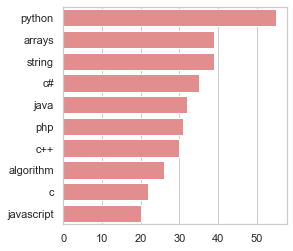

In [124]:
sns.set_theme(style="whitegrid")
fig_dims = (4, 4)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.barplot(x=actual_counts6, y=counts_6_list, color='lightcoral')

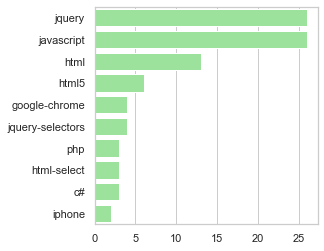

In [125]:
df_topic7 = df_top80percent_proba[df_top80percent_proba['topic'] == 7]
counts7 = df_topic7.tags.str.split(expand=True).stack().value_counts()
counts7_list = counts7.index.tolist()[:10]
actual7_list = counts7.to_list()[:10]

sns.set_theme(style="whitegrid")
fig_dims = (4, 4)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.barplot(x=actual7_list, y=counts7_list, color='lightgreen')

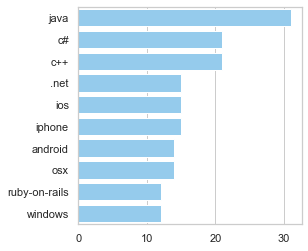

In [127]:
df_topic19 = df_top80percent_proba[df_top80percent_proba['topic'] == 19]
counts19 = df_topic19.tags.str.split(expand=True).stack().value_counts()
counts19_list = counts19.index.tolist()[:10]
actual19_list = counts19.to_list()[:10]

sns.set_theme(style="whitegrid")
fig_dims = (4, 4)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.barplot(x=actual19_list, y=counts19_list, color='lightskyblue')

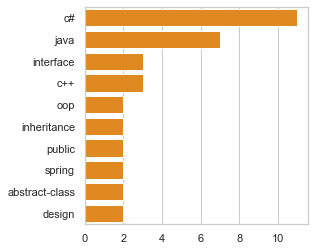

In [129]:
df_topic8 = df_top80percent_proba[df_top80percent_proba['topic'] == 8]
counts8 = df_topic8.tags.str.split(expand=True).stack().value_counts()
counts8_list = counts8.index.tolist()[:10]
actual8_list = counts8.to_list()[:10]

sns.set_theme(style="whitegrid")
fig_dims = (4, 4)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.barplot(x=actual8_list, y=counts8_list, color='darkorange')

In [53]:
# get the counts for each unique tag
counts = df_top80percent_proba.tags.str.split(expand=True).stack().value_counts()
counts

c#                  74
java                73
python              70
c++                 55
javascript          47
                    ..
deserialization      1
organization         1
cpython              1
xcode4               1
pattern-matching     1
Length: 697, dtype: int64

In [60]:
len(counts)

697

In [61]:
# convert the 10 most used tags to a list
counts_list = counts.index.tolist()[:10]
counts_list

['c#',
 'java',
 'python',
 'c++',
 'javascript',
 'php',
 'arrays',
 'string',
 '.net',
 'c']

In [56]:
counts[1]

73

In [62]:
actual_counts = counts.to_list()[:10]
actual_counts

[74, 73, 70, 55, 47, 40, 39, 39, 31, 30]

Text(0.5, 1.0, 'Frequency of Top 10 Most Common Tags with Topic Probability > 80%')

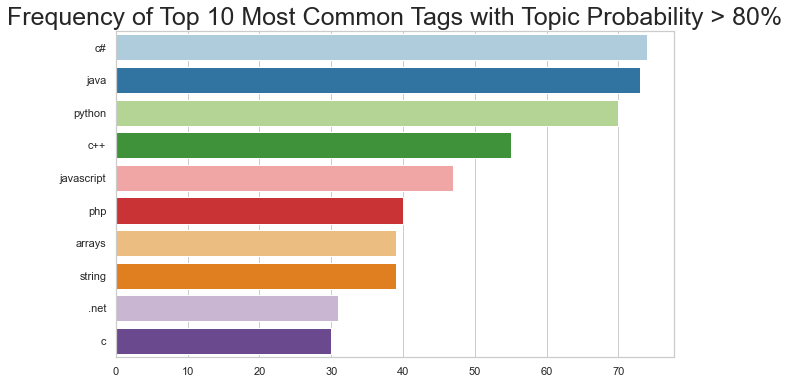

In [89]:
import seaborn as sns
sns.set_theme(style="whitegrid")
fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.barplot(x=actual_counts, y=counts_list, palette='Paired')
plt.title("Frequency of Top 10 Most Common Tags with Topic Probability > 80%", fontsize=25)

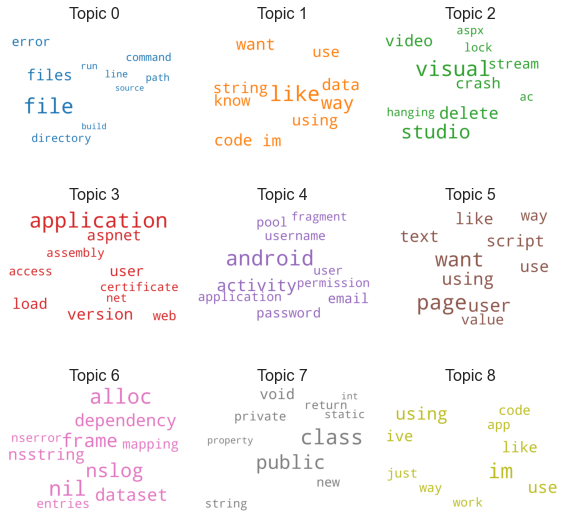

In [97]:
# wordcloud of top n words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords='english',
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda5.show_topics(formatted=False)

fig, axes = plt.subplots(3, 3, figsize=(8,8), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

Let's try to look at the tags used according to each topic.

In [132]:
def format_topics_sentences(ldamodel, corpus, texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

df_topic_sents_keywords = format_topics_sentences(ldamodel=lda5, corpus=corpus, texts=cv.vocabulary_.items())

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,5.0,0.3395,"like, way, want, im, data, code, using, string...","(piece, 40494)"
1,1,6.0,0.3403,"page, want, user, using, text, script, use, li...","(code, 7003)"
2,2,5.0,0.4106,"like, way, want, im, data, code, using, string...","(peculiar, 40004)"
3,3,5.0,0.2891,"like, way, want, im, data, code, using, string...","(strange, 49287)"
4,4,16.0,0.3419,"new, object, var, null, test, code, error, exc...","(reason, 43384)"
5,5,1.0,0.3727,"warning, compiler, difference, reference, pers...","(sorting, 48256)"
6,6,18.0,0.3675,"im, using, use, ive, like, code, just, app, wa...","(data, 10144)"
7,7,5.0,0.4468,"like, way, want, im, data, code, using, string...","(miraculously, 33115)"
8,8,5.0,0.2613,"like, way, want, im, data, code, using, string...","(makes, 31549)"
9,9,18.0,0.4108,"im, using, use, ive, like, code, just, app, wa...","(times, 53304)"


In [133]:
# Display setting to show more characters in column
pd.options.display.max_colwidth = 100

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf_mallet.head(10)

,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text
0,0.0,0.8964,"git, branch, changes, gem, repository, merge, commit, repo, feature, master","(computer, 7750)"
1,1.0,0.7625,"warning, compiler, difference, reference, person, pointers, gcc, pointer, functions, declaration","(branches, 5063)"
2,2.0,0.7834,"int, date, type, datetime, long, byte, include, return, struct, const","(threadpool, 53061)"
3,3.0,0.8363,"data, url, json, post, request, template, controller, view, response, http","(mlisteneronmessageinitialisation, 33225)"
4,4.0,0.5527,"visual, studio, delete, video, crash, stream, lock, ac, aspx, hanging","(cstyle, 9439)"
5,5.0,0.9793,"like, way, want, im, data, code, using, string, know, use","(realise, 43359)"
6,6.0,0.9712,"page, want, user, using, text, script, use, like, way, value","(pure, 42654)"
7,7.0,0.9427,"class, public, void, new, private, return, string, static, property, int","(deployments, 11529)"
8,8.0,0.8710,"import, image, python, module, def, django, images, map, draw, line","(deserves, 11635)"
9,9.0,0.3847,"nil, alloc, nslog, frame, dataset, dependency, nsstring, mapping, entries, nserror","(hitting, 21858)"
